In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("NewCar.csv")
df.head()

,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,engine-location,wheel-base,length,width,height,curbweight,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,citympg,highway-mpg,price
0,121.803681,gas,std,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,9.0,111,5000,21,27.0,13495.0
1,121.803681,gas,std,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,9.0,111,5000,21,27.0,16500.0
2,121.803681,gas,std,two,hatchback,front,94.5,171.2,65.5,52.4,2823,six,152,mpfi,9.0,154,5000,19,26.0,16500.0
3,164.000000,gas,std,four,sedan,front,99.8,176.6,66.2,54.3,2337,four,109,mpfi,10.0,102,5500,24,30.0,13950.0
4,164.000000,gas,std,four,sedan,front,99.4,176.6,66.4,54.3,2824,five,136,mpfi,8.0,115,5500,18,22.0,17450.0


In [3]:
x=df[['normalized-losses', 'wheel-base', 'length', 'width','height', 'curbweight', 'engine-size',
   'compression-ratio', 'horsepower', 'peak-rpm', 'citympg','highway-mpg']]
y=df['price']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.33, random_state=42)

In [5]:
yt=y_train.values
yt=yt.reshape(136,1)

In [6]:
from sklearn.preprocessing import StandardScaler
sx=StandardScaler()
sy=StandardScaler()
x1=sx.fit_transform(X_train.astype(float))
y1=sy.fit_transform(yt)

In [7]:
from sklearn.svm import SVR
s=SVR()
s.fit(x1,y1.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
print(s.intercept_)

[0.60666088]


In [9]:
a=sx.transform(X_test.astype(float))

In [10]:
prediction=sy.inverse_transform(s.predict(a))
prediction

array([19499.76775782, 18060.72764855, 19525.2989264 ,  9859.61750658,
       19309.15758257, 10945.43630981,  9358.15481614, 19570.48624954,
       19643.27279659,  8982.27861358, 26946.92112985,  8374.04856733,
       12186.72760774,  8316.52672129, 13251.16029236, 12341.19668095,
       12454.10903208,  8917.38807967, 13247.43093073,  9460.43327231,
       19350.69662875,  7958.16300527,  6748.37273793,  8461.88054322,
       20479.39503593, 21730.36903985, 10440.60141839,  9977.49771806,
       11525.49852856, 20445.2169944 , 20405.34025239, 20078.38761434,
       21268.19713129, 21021.43554482,  6797.67082592, 16828.91568879,
        7687.40640495,  7355.27289643, 12199.43868084,  8155.39492426,
       13714.47621663, 18048.94094933,  6480.68230649, 10146.88837382,
        6629.03243376,  7756.80629547, 15565.48918631, 10735.47735549,
        6726.43739043,  9440.48569417,  6529.6988353 , 12234.63838608,
        6535.89147791, 13878.65165368, 13090.76118693,  6726.11220029,
      

In [11]:
y_test.values

array([27500.        , 12663.45595855, 18150.        ,  9959.        ,
       27500.        , 11048.        , 11259.        , 15998.        ,
       21485.        ,  7775.        , 27500.        ,  8238.        ,
        9639.        , 11595.        , 12663.45595855, 13845.        ,
        5151.        ,  8499.        , 12663.45595855, 10198.        ,
       16558.        ,  8949.        ,  7999.        ,  6855.        ,
       27500.        , 27500.        ,  9988.        ,  9279.        ,
        9298.        , 27500.        , 25552.        , 27500.        ,
       12663.45595855, 27500.        ,  6669.        , 14399.        ,
        7126.        ,  7053.        ,  8449.        ,  8189.        ,
       14489.        , 16845.        ,  7799.        ,  8845.        ,
        6229.        ,  8249.        , 16695.        ,  6479.        ,
        6295.        , 10595.        ,  6938.        ,  9989.        ,
        6849.        , 15250.        , 12663.45595855,  6229.        ,
      

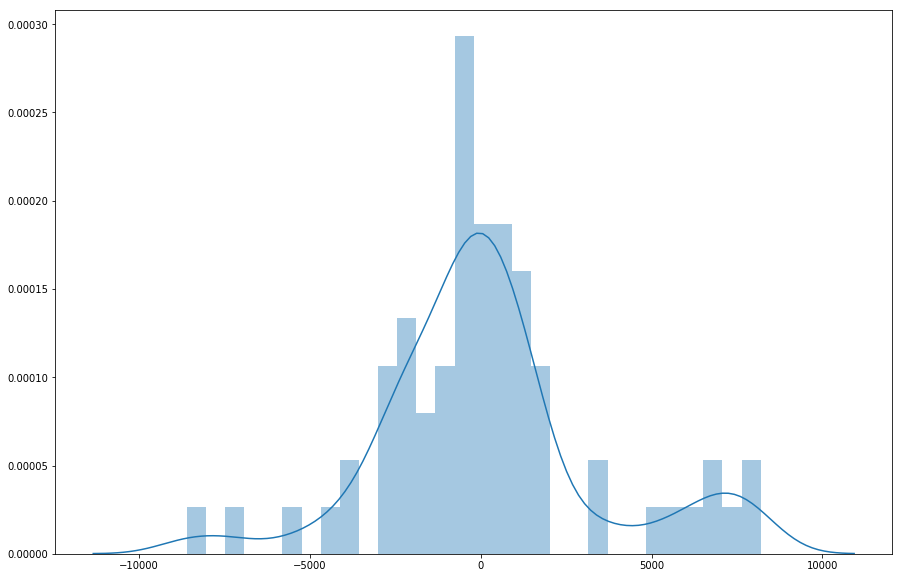

In [12]:
plt.figure(figsize = (15,10))
sns.distplot(y_test.values - prediction,bins=30)

In [13]:
from sklearn import metrics

In [14]:
metrics.mean_absolute_error(y_test,prediction)

2250.1448726074746

In [15]:
metrics.mean_squared_error(y_test,prediction)

10516530.34590619

In [16]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

3242.9200338439105

In [17]:
metrics.r2_score(y_train,sy.inverse_transform(s.predict(x1)))

0.9041460231142656

In [18]:
metrics.r2_score(y_test,prediction)

0.7652901832034318

# Using categorical variable

In [19]:
x1=pd.read_csv("CategoriacalCar.csv")
y=x1["price"]

In [20]:
x1=x1.iloc[:,:-1]
x1.head()

,normalized-losses,wheel-base,length,width,height,curbweight,engine-size,compression-ratio,horsepower,peak-rpm,...,three,twelve,two.1,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
0,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,...,0,0,0,0,0,0,0,0,1,0
1,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,...,0,0,0,0,0,0,0,0,1,0
2,121.803681,94.5,171.2,65.5,52.4,2823,152,9.0,154,5000,...,0,0,0,0,0,0,0,0,1,0
3,164.000000,99.8,176.6,66.2,54.3,2337,109,10.0,102,5500,...,0,0,0,0,0,0,0,0,1,0
4,164.000000,99.4,176.6,66.4,54.3,2824,136,8.0,115,5500,...,0,0,0,0,0,0,0,0,1,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(x1, y,test_size=0.33, random_state=42)

In [22]:
yt=y_train.values
yt=yt.reshape(136,1)

In [23]:
sx1=StandardScaler()
sy1=StandardScaler()
x1=sx1.fit_transform(X_train.astype(float))
y1=sy1.fit_transform(yt)

In [24]:
s1=SVR(kernel="linear")
s1.fit(x1,y1.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
print(s1.intercept_)

[-0.03715419]


In [26]:
a=sx1.transform(X_test.astype(float))

In [27]:
prediction=sy1.inverse_transform(s1.predict(a))
prediction

array([21436.56065635, 21529.332919  , 19853.95973168, 10257.31875298,
       23062.38697583, 11155.39144654, 13104.31039505, 18910.15081277,
       19881.37743215,  7879.39580581, 26749.22135126,  7390.62083297,
       12239.56237035, 12868.64778111, 12095.53437043, 12336.52399837,
        5889.83494867,  9244.24583021, 12069.0470384 ,  9291.68829718,
       18795.39803345, 10168.16255811,  5591.07918837,  4817.85972429,
       30171.70880494, 22127.33197177, 10455.84626287,  9808.55724338,
       10675.18626039, 26903.39781721, 23687.48522028, 25870.97572784,
       22890.71347404, 23475.42520277,  6612.99530494, 18415.1541332 ,
        8683.32287194,  6113.94273223, 12260.75223597, 10287.02998389,
       13716.17116284, 16538.71033997,  6602.00605529,  9888.05927811,
        6731.57772293,  7429.08628809, 16119.6626824 ,  3148.99390201,
        6010.00915664,  9756.01773639,  7407.33896704, 11393.27442887,
        6797.10862134, 15571.16564167,  9000.31460297,  6736.27430689,
      

In [28]:
y_test.values

array([27500.        , 12663.45595855, 18150.        ,  9959.        ,
       27500.        , 11048.        , 11259.        , 15998.        ,
       21485.        ,  7775.        , 27500.        ,  8238.        ,
        9639.        , 11595.        , 12663.45595855, 13845.        ,
        5151.        ,  8499.        , 12663.45595855, 10198.        ,
       16558.        ,  8949.        ,  7999.        ,  6855.        ,
       27500.        , 27500.        ,  9988.        ,  9279.        ,
        9298.        , 27500.        , 25552.        , 27500.        ,
       12663.45595855, 27500.        ,  6669.        , 14399.        ,
        7126.        ,  7053.        ,  8449.        ,  8189.        ,
       14489.        , 16845.        ,  7799.        ,  8845.        ,
        6229.        ,  8249.        , 16695.        ,  6479.        ,
        6295.        , 10595.        ,  6938.        ,  9989.        ,
        6849.        , 15250.        , 12663.45595855,  6229.        ,
      

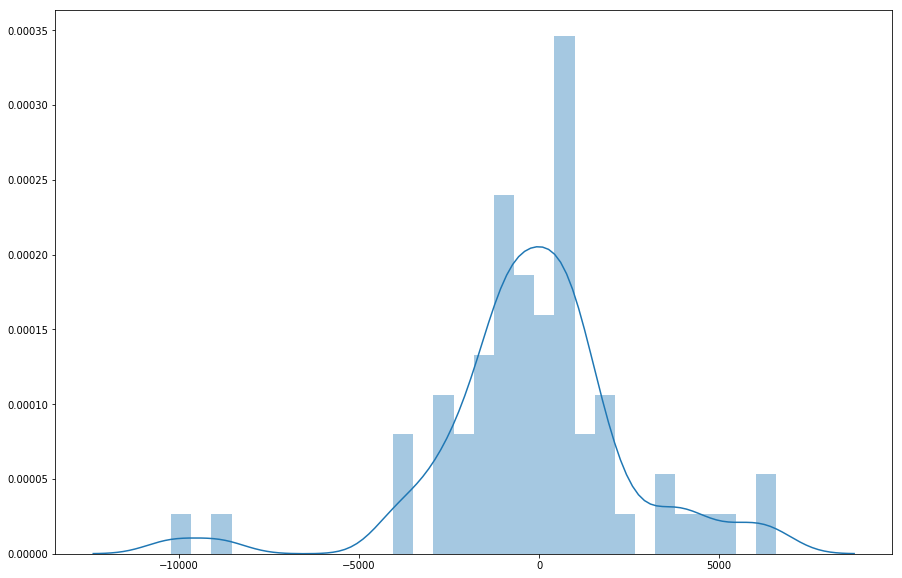

In [29]:
plt.figure(figsize = (15,10))
sns.distplot(y_test.values - prediction,bins=30)

In [30]:
metrics.mean_absolute_error(y_test,prediction)

1851.7908698974036

In [31]:
metrics.mean_squared_error(y_test,prediction)

7347487.2499853615

In [32]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

2710.624881828056

In [33]:
metrics.r2_score(y_train,sy1.inverse_transform(s1.predict(x1)))

0.8667498614919922

In [34]:
metrics.r2_score(y_test,prediction)

0.8360174573137138

# Using significat variable

In [35]:
x=pd.read_csv("CategoriacalCar.csv")
x.head()

,normalized-losses,wheel-base,length,width,height,curbweight,engine-size,compression-ratio,horsepower,peak-rpm,...,twelve,two.1,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,price
0,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,13495.0
1,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,16500.0
2,121.803681,94.5,171.2,65.5,52.4,2823,152,9.0,154,5000,...,0,0,0,0,0,0,0,1,0,16500.0
3,164.000000,99.8,176.6,66.2,54.3,2337,109,10.0,102,5500,...,0,0,0,0,0,0,0,1,0,13950.0
4,164.000000,99.4,176.6,66.4,54.3,2824,136,8.0,115,5500,...,0,0,0,0,0,0,0,1,0,17450.0


In [36]:
a=['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curbweight', 'compression-ratio', 'horsepower',
      'citympg',  'gas', 'turbo', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'rear',  'four', 'six', 'three',
        '1bbl', '2bbl', 'idi', 'mfi', 'mpfi',
       'spdi']

In [37]:
y=x["price"]
x1=x[a]
x1.head()

,normalized-losses,wheel-base,length,width,height,curbweight,compression-ratio,horsepower,citympg,gas,...,rear,four,six,three,1bbl,2bbl,idi,mfi,mpfi,spdi
0,121.803681,88.6,168.8,64.1,48.8,2548,9.0,111,21,1,...,0,1,0,0,0,0,0,0,1,0
1,121.803681,88.6,168.8,64.1,48.8,2548,9.0,111,21,1,...,0,1,0,0,0,0,0,0,1,0
2,121.803681,94.5,171.2,65.5,52.4,2823,9.0,154,19,1,...,0,0,1,0,0,0,0,0,1,0
3,164.000000,99.8,176.6,66.2,54.3,2337,10.0,102,24,1,...,0,1,0,0,0,0,0,0,1,0
4,164.000000,99.4,176.6,66.4,54.3,2824,8.0,115,18,1,...,0,0,0,0,0,0,0,0,1,0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(x1, y,test_size=0.33, random_state=42)

In [39]:
yt=y_train.values
yt=yt.reshape(136,1)

In [40]:
sx1=StandardScaler()
sy1=StandardScaler()
x1=sx1.fit_transform(X_train.astype(float))
y1=sy1.fit_transform(yt)

In [41]:
s1=SVR(kernel="linear")
s1.fit(x1,y1.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
print(s1.intercept_)

[-0.03281339]


In [43]:
a=sx1.transform(X_test.astype(float))

In [44]:
prediction=sy1.inverse_transform(s1.predict(a))
prediction

array([20754.2665363 , 21713.97794868, 19409.15574419, 10188.17665212,
       23261.46184718, 11490.18334638, 13226.36688587, 19342.6026252 ,
       19137.55462976,  7971.92744256, 26575.56904637,  7830.58677081,
       12868.43683662, 12129.03458577, 12087.84440062, 12115.54997601,
        6059.80293438,  9623.07400612, 12064.38222908,  9578.2284774 ,
       19200.74473489,  9553.92153061,  5835.71641336,  5268.21896449,
       30058.59808702, 21872.66725218, 10980.49704501,  9316.6750136 ,
       10635.9708826 , 26905.29149072, 23737.14658266, 25906.67821521,
       22933.27312713, 23398.78590135,  6729.34117027, 18141.6943236 ,
        9052.89317443,  6526.80539723, 12887.20657386, 10267.13440004,
       13663.46156735, 16314.98583348,  6706.76386326,  9897.42327286,
        6386.97227654,  7506.97761598, 16291.59638113,  4801.80216891,
        6034.30688337,  9994.47527973,  7626.26627004, 12252.40150971,
        6746.91109394, 16183.603006  ,  8709.65766444,  6417.37947526,
      

In [45]:
y_test.values

array([27500.        , 12663.45595855, 18150.        ,  9959.        ,
       27500.        , 11048.        , 11259.        , 15998.        ,
       21485.        ,  7775.        , 27500.        ,  8238.        ,
        9639.        , 11595.        , 12663.45595855, 13845.        ,
        5151.        ,  8499.        , 12663.45595855, 10198.        ,
       16558.        ,  8949.        ,  7999.        ,  6855.        ,
       27500.        , 27500.        ,  9988.        ,  9279.        ,
        9298.        , 27500.        , 25552.        , 27500.        ,
       12663.45595855, 27500.        ,  6669.        , 14399.        ,
        7126.        ,  7053.        ,  8449.        ,  8189.        ,
       14489.        , 16845.        ,  7799.        ,  8845.        ,
        6229.        ,  8249.        , 16695.        ,  6479.        ,
        6295.        , 10595.        ,  6938.        ,  9989.        ,
        6849.        , 15250.        , 12663.45595855,  6229.        ,
      

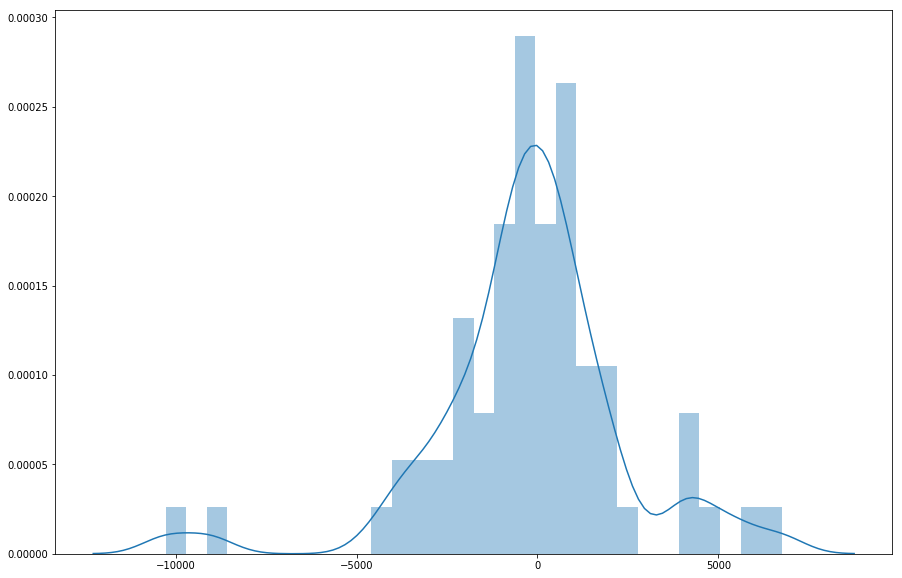

In [46]:
plt.figure(figsize = (15,10))
sns.distplot(y_test.values - prediction,bins=30)

In [47]:
metrics.mean_absolute_error(y_test,prediction)

1811.9961247432834

In [48]:
metrics.mean_squared_error(y_test,prediction)

7338849.487042468

In [49]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

2709.031097466854

In [50]:
metrics.r2_score(y_train,sy1.inverse_transform(s1.predict(x1)))

0.8717006750172176

In [51]:
metrics.r2_score(y_test,prediction)

0.8362102364615103